<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week5/DailyChallenge/DailyChallnge_w5_d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#@Author : Adil MOUKRIM

## Daily Challenge : Building Your First Neural Network
Last Updated: February 14th, 2025

Daily Challenge: Building Your First Neural Network on the MNIST Dataset


👩‍🏫 👩🏿‍🏫 What You’ll learn
How to load and preprocess the MNIST dataset
How to build and train a simple neural network for digit classification
How to evaluate a neural network’s performance using accuracy metrics
How to optimize model performance through hyperparameter tuning


🛠️ What you will create
A fully connected neural network for recognizing handwritten digits
A training pipeline to learn from the MNIST dataset
A visualization of the model’s performance on test images
A basic hyperparameter tuning experiment


What You Need to Do
1. Load and Preprocess the MNIST Dataset

Load the MNIST dataset using TensorFlow/Keras
Normalize the image pixel values to be between 0 and 1
Convert labels into one-hot encoded format
Split the dataset into training and test sets
Display sample images with their corresponding labels
2. Build a Fully Connected Neural Network

Define a sequential model using Keras
Flatten the 28x28 input images into a single vector
Add two hidden layers with ReLU activation
Add an output layer with Softmax activation for multi-class classification
Compile the model using categorical cross-entropy as the loss function and accuracy as the evaluation metric
3. Train the Neural Network

Fit the model to the training data for 10 epochs
Use a validation set to track performance during training
Observe the loss and accuracy trends over the epochs
4. Evaluate the Model’s Performance

Compute accuracy on the test dataset
Display a confusion matrix for misclassified digits
Identify which digits the model struggles with the most

In [ ]:
# !pip install tensorflow numpy scikit-learn matplotlib seaborn
#!pip install scikit-learn

In [ ]:
""" import numpy as np
import matplotlib.pyplot as plt
from sklearn.metric import confusion_matrix """

' import numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.metric import confusion_matrix '

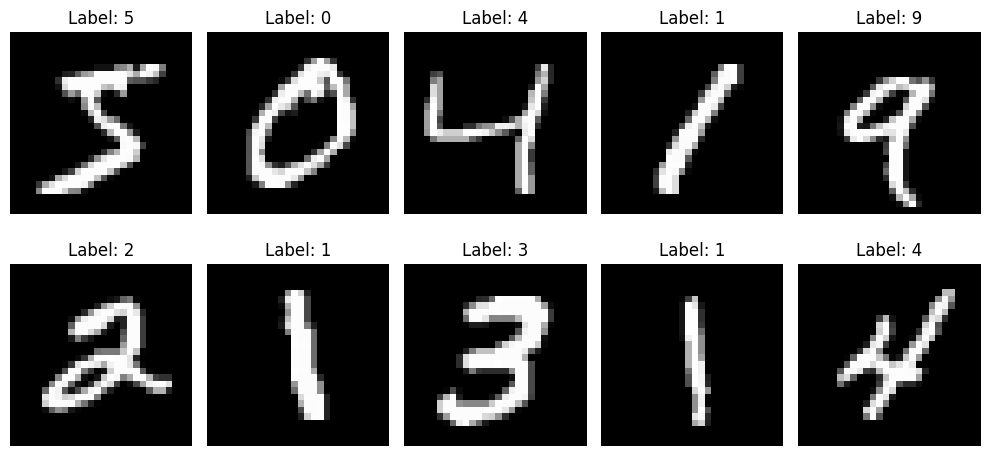

In [ ]:
#Step 1: Load and Preprocess the MNIST Dataset
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize image pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Display sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Step 2: Build a Fully Connected Neural Network


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),    # Flatten 28x28 images
    Dense(128, activation='relu'),    # First hidden layer
    Dense(64, activation='relu'),     # Second hidden layer
    Dense(10, activation='softmax')   # Output layer for 10 classes
])

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Step 3: Train the Neural Network
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)
print(x_train,y_train_cat.shape)

Epoch 1/10
1500/1500 - 8s - 6ms/step - accuracy: 0.9228 - loss: 0.2646 - val_accuracy: 0.9548 - val_loss: 0.1466
Epoch 2/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9660 - loss: 0.1113 - val_accuracy: 0.9728 - val_loss: 0.0925
Epoch 3/10
1500/1500 - 8s - 5ms/step - accuracy: 0.9775 - loss: 0.0738 - val_accuracy: 0.9693 - val_loss: 0.1089
Epoch 4/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9823 - loss: 0.0557 - val_accuracy: 0.9716 - val_loss: 0.0953
Epoch 5/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9867 - loss: 0.0427 - val_accuracy: 0.9732 - val_loss: 0.0934
Epoch 6/10
1500/1500 - 8s - 6ms/step - accuracy: 0.9883 - loss: 0.0348 - val_accuracy: 0.9751 - val_loss: 0.0998
Epoch 7/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9736 - val_loss: 0.0989
Epoch 8/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9919 - loss: 0.0237 - val_accuracy: 0.9753 - val_loss: 0.0995
Epoch 9/10
1500/1500 - 12s - 8ms/step - accuracy: 0.9923 - loss: 0.0220 - val_accuracy: 0.975

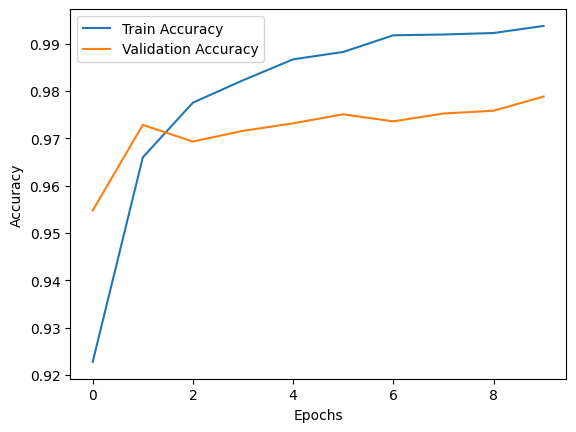

In [ ]:
#plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


INterprétation du graphique :
la Courbe bleue : précision sur les données d'entraînement

Courbe orange : précision sur les données de validation

le modèle est entraîné sur 10 époques.

✅ Points positifs :
Précision d'entraînement très élevée : elle atteint ~99.5%, ce qui montre que le modèle a bien appris les données d’entraînement.

Bonne précision de validation (~97%) : le modèle généralise plutôt bien sur les données non vues.

⚠️ Mais… signe de surapprentissage (overfitting) léger :
Dès l’epoch 2–3, la courbe de validation stagne, tandis que la courbe d’entraînement continue de monter.

Cela indique que le modèle commence à mémoriser les exemples du jeu d’entraînement, au lieu de généraliser.

Conclusion :
le modèle est bien paramétré, mais :

Il commence à surapprendre après 4-5 époques.

La validation accuracy plafonne à ~97.5%, ce qui est très bon, mais l’écart avec l’entraînement grandit.

💡 Recommandations :
Réduire le nombre d’époques à 5 ou 6.

Ajouter du Dropout entre les couches cachées :

In [ ]:
#Step 4: Evaluate the Model’s Performance
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9801


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


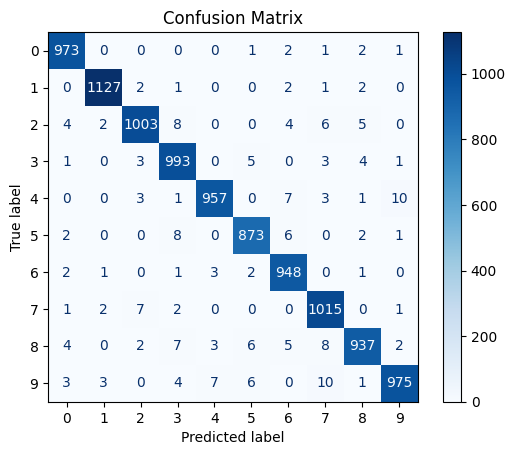

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Interprétation :
la diagonale est très marquée, ce qui signifie que la grande majorité des chiffres sont bien prédits.

Exemple :

Le chiffre 1 : 1127 bien classés sur ~1135 → presque parfait

Le chiffre 9 : 975 bons sur ~1000

⚠️ Erreurs fréquentes observées
4 → 9 (10 erreurs) et 9 → 4 (6 erreurs)
↪ Ces deux chiffres ont une forme similaire (surtout manuscrits).

5 → 3 (6 erreurs), 8 → 3 (6 erreurs)
↪ Les courbes peuvent prêter à confusion.

2 → 7 (7 erreurs)
↪ Manuscrits, ces deux chiffres sont parfois proches.

📈 Performance globale
Si on regarde la matrice :

Les erreurs sont faibles et dispersées

Cela confirme une accuracy élevée (~97% à 98%)

🛠️ Améliorations possibles (facultatif) :
Si tu veux améliorer encore :

Ajouter une couche de régularisation (Dropout)

Essayer un modèle CNN (convolutionnel), qui fonctionne encore mieux sur les images

Data augmentation pour rendre le modèle plus robuste à la variation manuscrite